### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [240]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




#### Reading Data and data description

In [244]:
data = pd.read_csv('data/coupons.csv')

In [246]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [249]:
data.shape

(12684, 26)

In [251]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [253]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [255]:
data['coupon'].value_counts().sort_values()

coupon
Restaurant(20-50)        1492
Bar                      2017
Carry out & Take away    2393
Restaurant(<20)          2786
Coffee House             3996
Name: count, dtype: int64

In [257]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [259]:
data['car'].value_counts().sort_values()

car
crossover                                   21
Car that is too old to install Onstar :D    21
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
Name: count, dtype: int64

In [261]:
data['Bar'].value_counts().sort_values()

Bar
gt8       349
4~8      1076
1~3      2473
less1    3482
never    5197
Name: count, dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

#### Data Correction and Formatting

**Update the fields for income into numeric fields**

In [266]:
data['income_replaced'] = data['income'].str.replace('$', '')
data['income_replaced'] = data['income_replaced'].str.replace('Less than ', '0-')
data['income_replaced'] = data['income_replaced'].str.replace('or More', '-inf')
data[['income_lower', 'income_higher']] = data['income_replaced'].str.split('-', expand = True)
data['income_lower'] = pd.to_numeric(data['income_lower'], downcast='float')
data['income_higher'] = pd.to_numeric(data['income_higher'], downcast='float')

**Update the fields with counts from categorical to numeric bounds**

In [269]:
def split_counts(count_str):
  match count_str:
    case 'never':
      return 0, 0
    case 'less1':
      return 0, 0
    case '1~3':
      return 1, 3
    case '4~8':
      return 4, 8
    case 'gt8':
      return 8, math.inf
    case _:
      return None, None

data[['Bar_lower', 'Bar_higher']] = data['Bar'].apply(lambda x: split_counts(x)).tolist()
data[['CoffeeHouse_lower', 'CoffeeHouse_higher']] = data['CoffeeHouse'].apply(lambda x: split_counts(x)).tolist()
data[['CarryAway_lower', 'CarryAway_higher']] = data['CarryAway'].apply(lambda x: split_counts(x)).tolist()
data[['RestaurantLessThan20_lower', 'RestaurantLessThan20_higher']] = data['RestaurantLessThan20'].apply(lambda x: split_counts(x)).tolist()
data[['Restaurant20To50_lower', 'Restaurant20To50_higher']] = data['Restaurant20To50'].apply(lambda x: split_counts(x)).tolist()

**Handling nulls**
- The following are the fields with null values.
  * car
  * Bar
  * CoffeeHouse
  * CarryAway
  * RestaurantLessThan20
  * Restaurant20To50

- The main decision column Y does not have any null values.
- Given the data set the nulls in the mentioned fields may not have direct implication in the decision column, and null does not necessarily infer a zero value.

Decision: Given the above conditions, it makes sense to retain the fields with nulls.

**Decision to update age fields**

- The age field is currently a string object.
- We should update it to numeric

In [273]:
data['age'].value_counts()

age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64

In [275]:
data['age'] = data['age'].replace('below21' ,'20')
data['age'] = data['age'].replace('50plus' ,'50')
data['age'] = pd.to_numeric(data['age'])
data['age'].value_counts()

age
21    2653
26    2559
31    2039
50    1788
36    1319
41    1093
46     686
20     547
Name: count, dtype: int64

#### General Acceptance Rate

**Update a field for coupon accepted**

In [279]:
data['coupon_accepted'] = data['Y'].apply(lambda x: 'accepted' if x == 1 else 'rejected')

4. What proportion of the total observations chose to accept the coupon?



In [282]:
data['Y'].value_counts(normalize = True)[1]

0.5684326710816777

5. Use a bar plot to visualize the `coupon` column.

### Bar Coupons

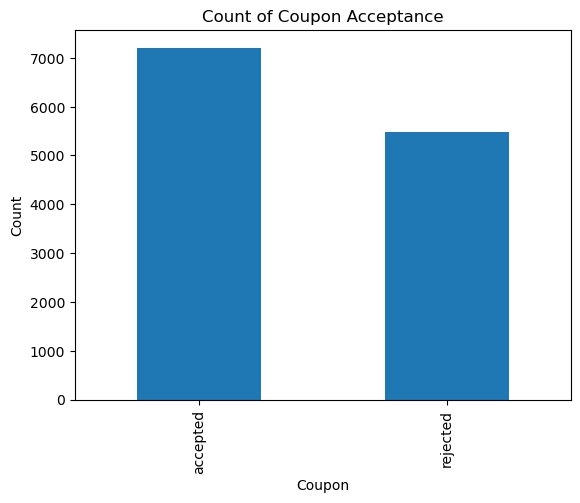

In [286]:
data['coupon_accepted'].value_counts().plot(kind = "bar")
plt.xlabel('Coupon')
plt.ylabel('Count')
plt.title('Count of Coupon Acceptance')

plt.show()

6. Use a histogram to visualize the temperature column.

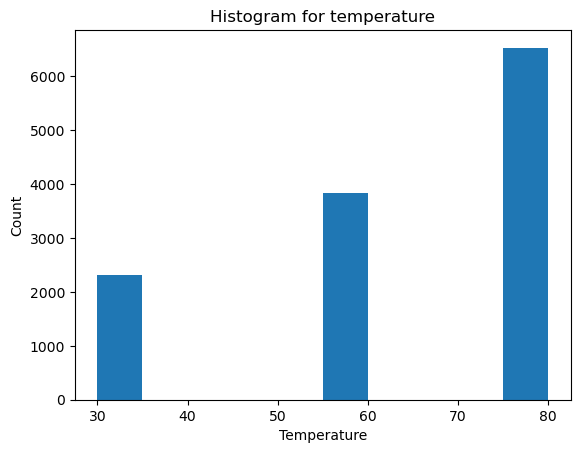

In [289]:
plt.hist(data['temperature'])
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Histogram for temperature')

plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [292]:
bar_df = data.query('coupon == "Bar"')

2. What proportion of bar coupons were accepted?


In [295]:
bar_df['Y'].value_counts(normalize = True)[1]

0.41001487357461575

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [298]:
acceptance_rate = pd.DataFrame(data = {
    'bar_visits': ['3_or_fewer', 'more_than_3'],
    'acceptance_rate': [
        bar_df.query('Bar_higher <= 3')['Y'].value_counts(normalize = True)[1],
        bar_df.query('Bar_lower > 3')['Y'].value_counts(normalize = True)[1]
      ]
})
acceptance_rate

,bar_visits,acceptance_rate
0,3_or_fewer,0.370618
1,more_than_3,0.768844


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [301]:
bar_more_than_one_over_25 = bar_df.query('Bar_lower > 1 and age > 25')['Y'].value_counts(normalize = True)[1]
all_others = bar_df.query('Bar_higher <= 1 or age <= 25')['Y'].value_counts(normalize = True)[1]
acceptance_rate = pd.DataFrame(data = {
    'age': ['over_25', 'under_25'],
    'acceptance_rate': [
        bar_more_than_one_over_25,
        all_others
    ]})
acceptance_rate

,age,acceptance_rate
0,over_25,0.772059
1,under_25,0.334179


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [304]:

occupations = ['farming', 'fishing', 'forestry']
acceptance_rate = bar_df.query('(Bar_lower > 1) & (passanger != "Kid(s)") & (occupation not in @occupations)')['Y'].value_counts(normalize = True)[1]
acceptance_rate

0.774869109947644

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [307]:
bar_df['maritalStatus'].unique()

array(['Unmarried partner', 'Single', 'Married partner', 'Divorced',
       'Widowed'], dtype=object)

In [309]:
bar_more_than_one = ['1~3', '4~8', 'gt8']
more_than_4 = ['4~8', 'gt8']
not_widowed_rate = bar_df.query('(Bar_lower > 1) & (passanger != "Kid(s)") & (maritalStatus != "Widowed")')['Y'].value_counts(normalize = True)[1]
under_30_rate = bar_df.query('(Bar_lower > 1) & (age < 30)')['Y'].value_counts(normalize = True)[1]
less_than_50K_rate = bar_df[(bar_df['RestaurantLessThan20_lower'] > 4) & (data['income_higher'] < 50_000)]['Y'].value_counts(normalize = True)[1]

acceptance_rate = pd.DataFrame(data = {
    'conditions': ['not_widowed', 'under_30', 'income < 50k'],
    'acceptance_rate': [
        not_widowed_rate,
        under_30_rate,
        less_than_50K_rate
    ]})
acceptance_rate

/var/folders/dm/7_84vz71127dh6f8xl5xzmyr0000gn/T/ipykernel_19021/2255840075.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  less_than_50K_rate = bar_df[(bar_df['RestaurantLessThan20_lower'] > 4) & (data['income_higher'] < 50_000)]['Y'].value_counts(normalize = True)[1]


,conditions,acceptance_rate
0,not_widowed,0.774869
1,under_30,0.808824
2,income < 50k,0.593750


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

* Bar coupons have lower than average acceptance rate at ~ 40%. However some factors favor higher acceptability rate.
* People who generally make more visits to the bar tend to have higher acceptance rate.
* From the data there seem to be an optimal target for young adults i.e older than 25 but younger than 30. These population tend to exhibit the characteristics of being unmarried, or just partnered but in most cases without kids.
* The above target may not apply for some occupations like farming, fishing and forestry

## Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Potential investigation
- Potential ways of slicing data for each type of coupon
- Slice independent of all factors use histogram seperated by acceptance
- Acceptance rate be different non categorical slicing

### Create Utility Method that will be re-used across sections

In [313]:
def hist_with_acceptance_rate(target_df, factor, coupons_category):
  sns.histplot(data = target_df, x = factor, hue = 'coupon_accepted', multiple="dodge")
  plt.xlabel(factor)
  plt.xticks(rotation = 45)
  plt.ylabel('Count')
  plt.title(f'Histogram for {factor} vs {coupons_category}')

  plt.show()
  print(target_df.groupby(factor)['coupon_accepted'].value_counts(normalize = True))

### For all data collectively

1. Check whether any of these fields affect acceptance rate
  * destination
  * passanger
  * weather
  * temperature
  * time
  * expiration
  * gender
  * age
  * maritalStatus
  * education
  * occupation
  * income
2. Consider 2 possible combinations

#### Destination
- People with no urgent destination have higher acceptance rate

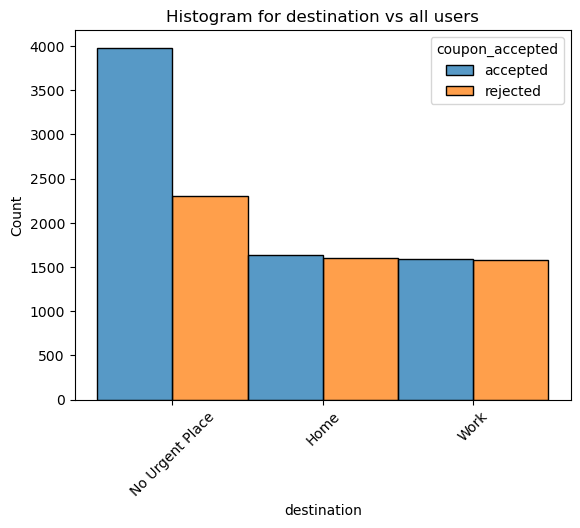

destination      coupon_accepted
Home             accepted           0.506333
                 rejected           0.493667
No Urgent Place  accepted           0.633774
                 rejected           0.366226
Work             accepted           0.502212
                 rejected           0.497788
Name: proportion, dtype: float64


In [315]:
hist_with_acceptance_rate(data, 'destination', 'all users')

#### Passanger
- Friend passangers leads to higher acceptance rate

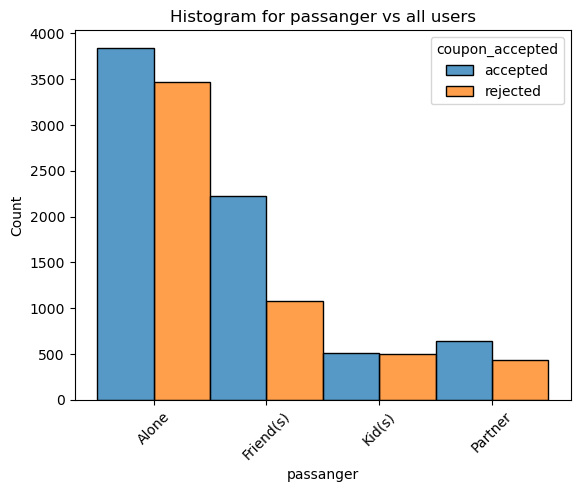

passanger  coupon_accepted
Alone      accepted           0.525804
           rejected           0.474196
Friend(s)  accepted           0.673438
           rejected           0.326562
Kid(s)     accepted           0.504970
           rejected           0.495030
Partner    accepted           0.595349
           rejected           0.404651
Name: proportion, dtype: float64


In [318]:
hist_with_acceptance_rate(data, 'passanger', 'all users')

#### Weather

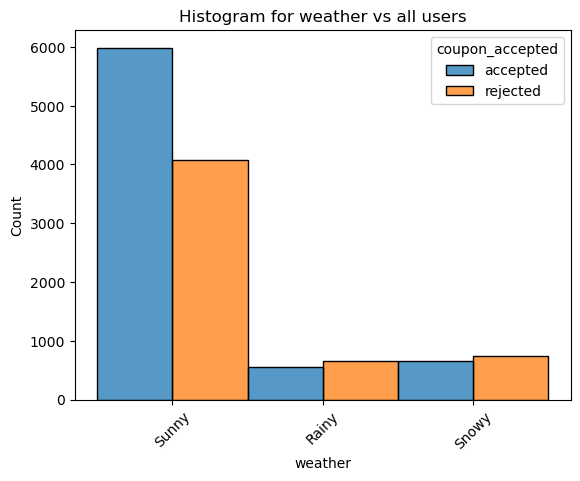

weather  coupon_accepted
Rainy    rejected           0.537190
         accepted           0.462810
Snowy    rejected           0.529537
         accepted           0.470463
Sunny    accepted           0.594796
         rejected           0.405204
Name: proportion, dtype: float64


In [321]:
hist_with_acceptance_rate(data, 'weather', 'all users')

#### Temperature

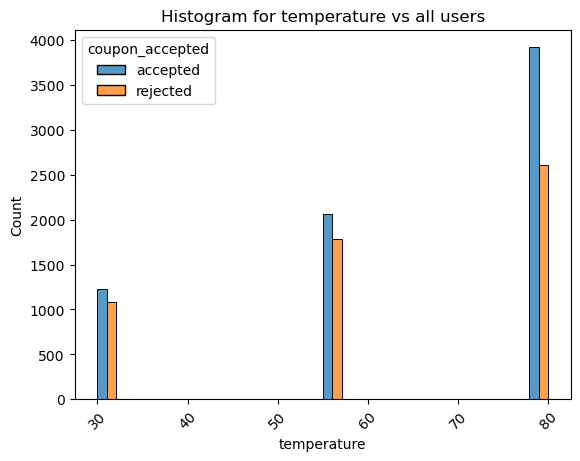

temperature  coupon_accepted
30           accepted           0.531088
             rejected           0.468912
55           accepted           0.536719
             rejected           0.463281
80           accepted           0.600337
             rejected           0.399663
Name: proportion, dtype: float64


In [324]:
hist_with_acceptance_rate(data, 'temperature', 'all users')

#### Time

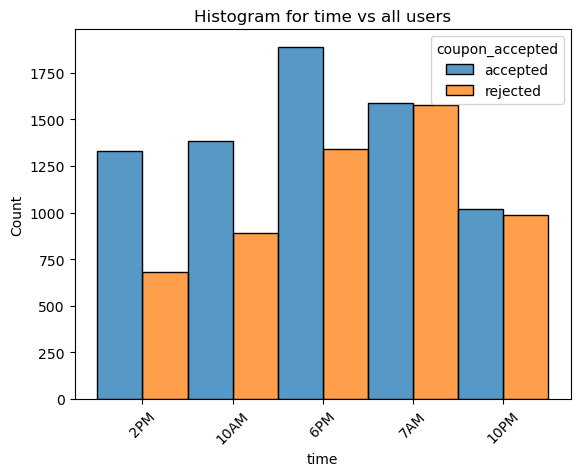

time  coupon_accepted
10AM  accepted           0.608352
      rejected           0.391648
10PM  accepted           0.508475
      rejected           0.491525
2PM   accepted           0.661523
      rejected           0.338477
6PM   accepted           0.584520
      rejected           0.415480
7AM   accepted           0.502212
      rejected           0.497788
Name: proportion, dtype: float64


In [327]:
hist_with_acceptance_rate(data, 'time', 'all users')

#### Coupon Type

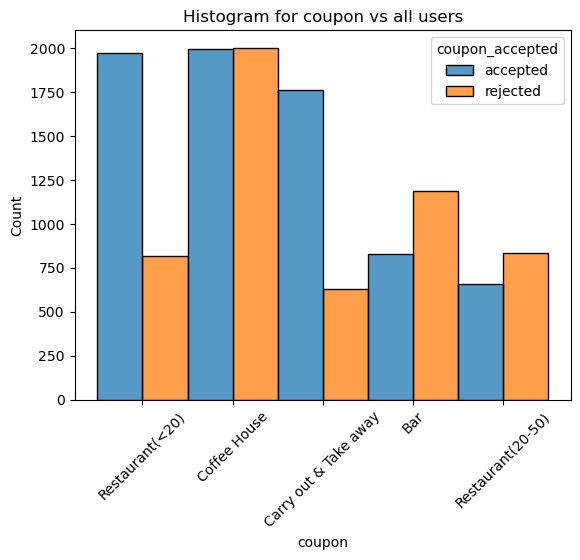

coupon                 coupon_accepted
Bar                    rejected           0.589985
                       accepted           0.410015
Carry out & Take away  accepted           0.735478
                       rejected           0.264522
Coffee House           rejected           0.500751
                       accepted           0.499249
Restaurant(20-50)      rejected           0.558981
                       accepted           0.441019
Restaurant(<20)        accepted           0.707107
                       rejected           0.292893
Name: proportion, dtype: float64


In [330]:
hist_with_acceptance_rate(data, 'coupon', 'all users')

#### Expiration

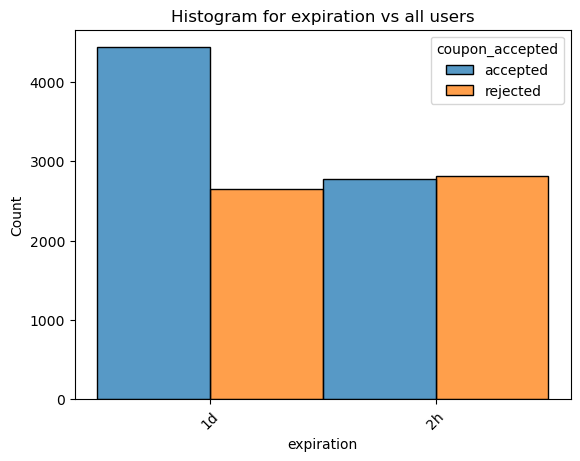

expiration  coupon_accepted
1d          accepted           0.625582
            rejected           0.374418
2h          rejected           0.504023
            accepted           0.495977
Name: proportion, dtype: float64


In [333]:
hist_with_acceptance_rate(data, 'expiration', 'all users')

#### Age
- younger people tend to have higher acceptance rate

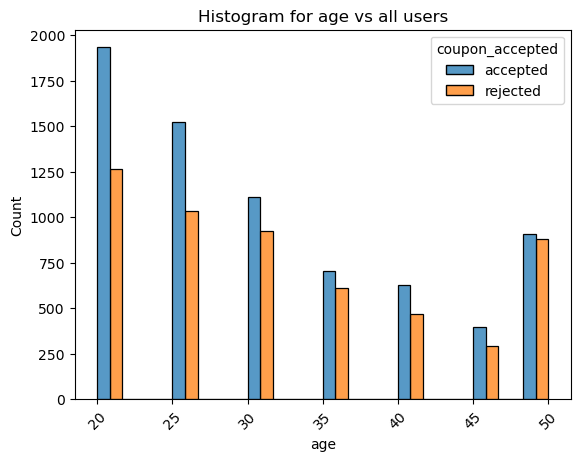

age  coupon_accepted
20   accepted           0.634369
     rejected           0.365631
21   accepted           0.598191
     rejected           0.401809
26   accepted           0.595936
     rejected           0.404064
31   accepted           0.546346
     rejected           0.453654
36   accepted           0.535254
     rejected           0.464746
41   accepted           0.572736
     rejected           0.427264
46   accepted           0.575802
     rejected           0.424198
50   accepted           0.508949
     rejected           0.491051
Name: proportion, dtype: float64


In [336]:
hist_with_acceptance_rate(data, 'age', 'all users')

#### Marital Status
- Single and unmarried partners have higher acceptance rate

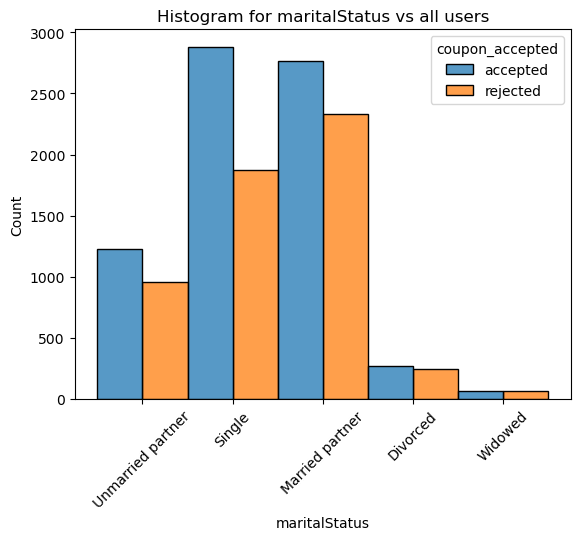

maritalStatus      coupon_accepted
Divorced           accepted           0.529070
                   rejected           0.470930
Married partner    accepted           0.542941
                   rejected           0.457059
Single             accepted           0.605850
                   rejected           0.394150
Unmarried partner  accepted           0.561299
                   rejected           0.438701
Widowed            rejected           0.523077
                   accepted           0.476923
Name: proportion, dtype: float64


In [339]:
hist_with_acceptance_rate(data, 'maritalStatus', 'all users')

#### Education
- People without college degree seem to have a higher rate

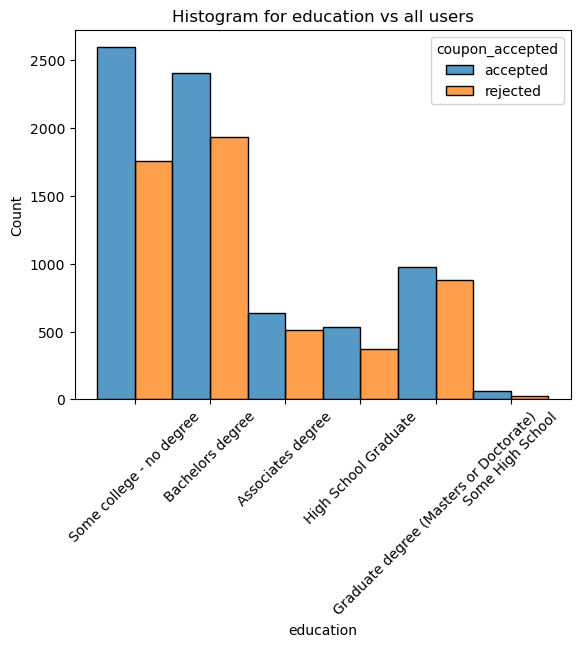

education                               coupon_accepted
Associates degree                       accepted           0.553339
                                        rejected           0.446661
Bachelors degree                        accepted           0.554325
                                        rejected           0.445675
Graduate degree (Masters or Doctorate)  accepted           0.526458
                                        rejected           0.473542
High School Graduate                    accepted           0.592265
                                        rejected           0.407735
Some High School                        accepted           0.715909
                                        rejected           0.284091
Some college - no degree                accepted           0.596415
                                        rejected           0.403585
Name: proportion, dtype: float64


In [342]:
hist_with_acceptance_rate(data, 'education', 'all users')

### Coffee House Coupons

In [345]:
coffee_df = data.query('coupon == "Coffee House"')

#### destination

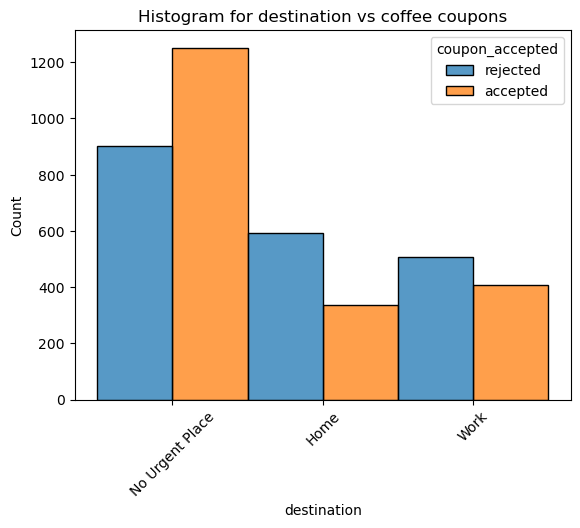

destination      coupon_accepted
Home             rejected           0.637931
                 accepted           0.362069
No Urgent Place  accepted           0.580974
                 rejected           0.419026
Work             rejected           0.554217
                 accepted           0.445783
Name: proportion, dtype: float64


In [348]:
hist_with_acceptance_rate(coffee_df, 'destination', 'coffee coupons')

#### Passanger

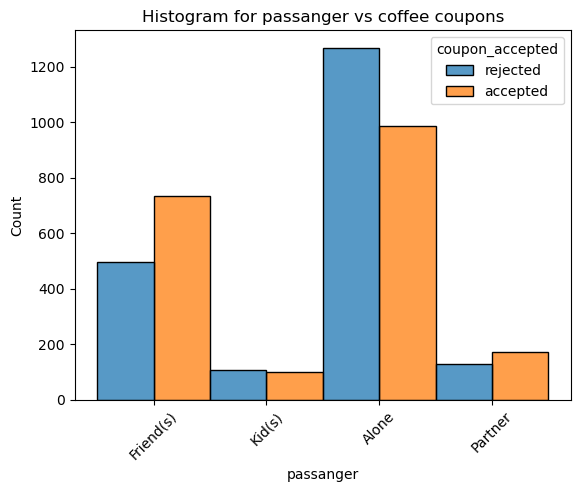

passanger  coupon_accepted
Alone      rejected           0.562057
           accepted           0.437943
Friend(s)  accepted           0.596906
           rejected           0.403094
Kid(s)     rejected           0.516908
           accepted           0.483092
Partner    accepted           0.570492
           rejected           0.429508
Name: proportion, dtype: float64


In [351]:
hist_with_acceptance_rate(coffee_df, 'passanger', 'coffee coupons')

#### Weather

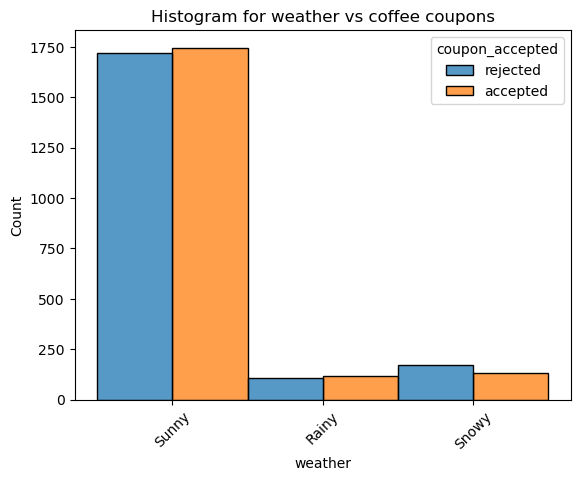

weather  coupon_accepted
Rainy    accepted           0.522124
         rejected           0.477876
Snowy    rejected           0.567657
         accepted           0.432343
Sunny    accepted           0.503605
         rejected           0.496395
Name: proportion, dtype: float64


In [354]:
hist_with_acceptance_rate(coffee_df, 'weather', 'coffee coupons')

#### Temperature

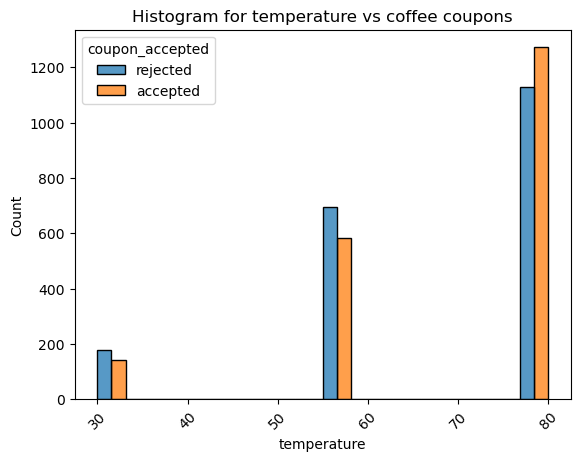

temperature  coupon_accepted
30           rejected           0.556604
             accepted           0.443396
55           rejected           0.544244
             accepted           0.455756
80           accepted           0.529779
             rejected           0.470221
Name: proportion, dtype: float64


In [357]:
hist_with_acceptance_rate(coffee_df, 'temperature', 'coffee coupons')

#### Time

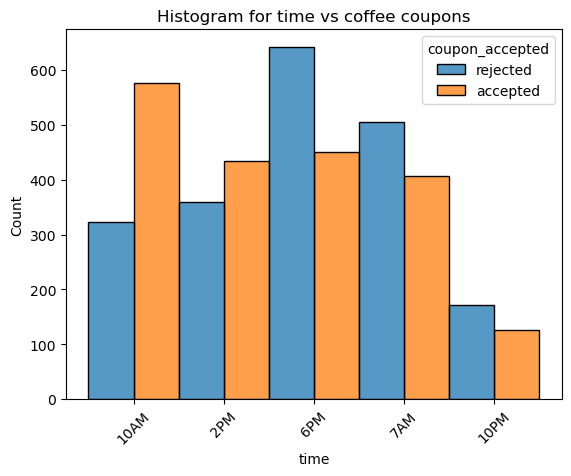

time  coupon_accepted
10AM  accepted           0.640712
      rejected           0.359288
10PM  rejected           0.575758
      accepted           0.424242
2PM   accepted           0.547859
      rejected           0.452141
6PM   rejected           0.587374
      accepted           0.412626
7AM   rejected           0.554217
      accepted           0.445783
Name: proportion, dtype: float64


In [360]:
hist_with_acceptance_rate(coffee_df, 'time', 'coffee coupons')

#### Age

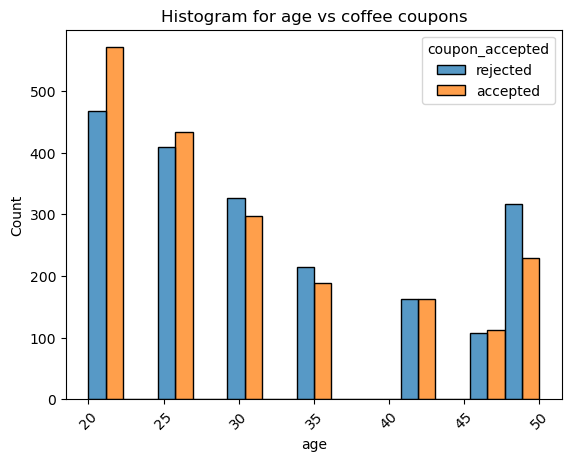

age  coupon_accepted
20   accepted           0.696774
     rejected           0.303226
21   accepted           0.524349
     rejected           0.475651
26   accepted           0.514828
     rejected           0.485172
31   rejected           0.523274
     accepted           0.476726
36   rejected           0.532338
     accepted           0.467662
41   accepted           0.501538
     rejected           0.498462
46   accepted           0.513636
     rejected           0.486364
50   rejected           0.579817
     accepted           0.420183
Name: proportion, dtype: float64


In [363]:
hist_with_acceptance_rate(coffee_df, 'age', 'coffee coupons')

### CarryAway Coupons


In [366]:
carry_away_df = data.query('coupon == "Carry out & Take away"')

#### Destination

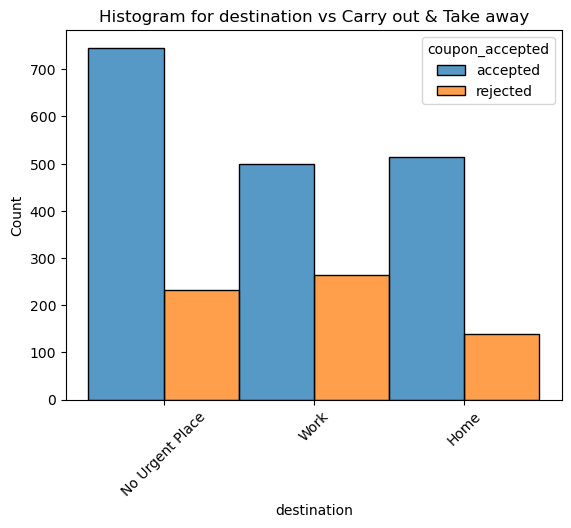

destination      coupon_accepted
Home             accepted           0.788668
                 rejected           0.211332
No Urgent Place  accepted           0.762781
                 rejected           0.237219
Work             accepted           0.654856
                 rejected           0.345144
Name: proportion, dtype: float64


In [369]:
hist_with_acceptance_rate(carry_away_df, 'destination', 'Carry out & Take away')

#### Passanger

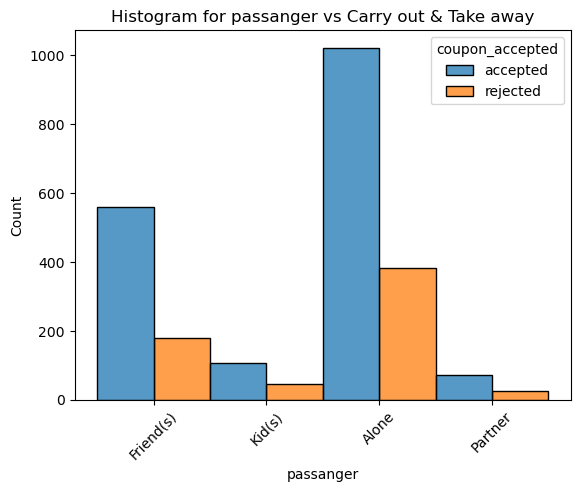

passanger  coupon_accepted
Alone      accepted           0.727402
           rejected           0.272598
Friend(s)  accepted           0.757781
           rejected           0.242219
Kid(s)     accepted           0.703947
           rejected           0.296053
Partner    accepted           0.731959
           rejected           0.268041
Name: proportion, dtype: float64


In [372]:
hist_with_acceptance_rate(carry_away_df, 'passanger', 'Carry out & Take away')

#### weather

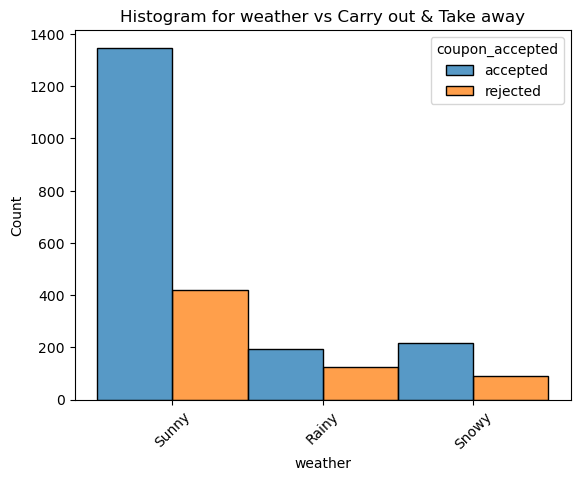

weather  coupon_accepted
Rainy    accepted           0.611285
         rejected           0.388715
Snowy    accepted           0.706840
         rejected           0.293160
Sunny    accepted           0.762875
         rejected           0.237125
Name: proportion, dtype: float64


In [375]:
hist_with_acceptance_rate(carry_away_df, 'weather', 'Carry out & Take away')

#### temperature

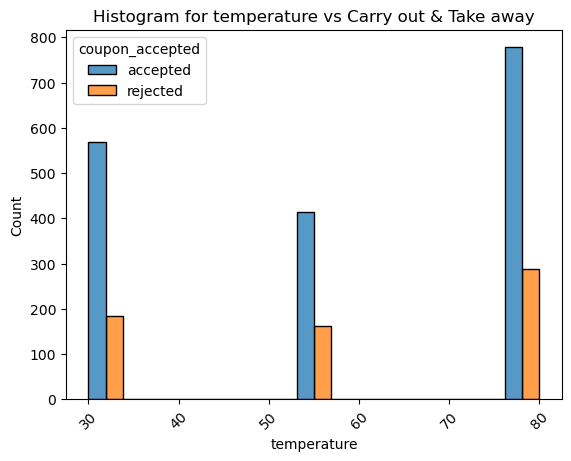

temperature  coupon_accepted
30           accepted           0.756325
             rejected           0.243675
55           accepted           0.718750
             rejected           0.281250
80           accepted           0.729831
             rejected           0.270169
Name: proportion, dtype: float64


In [378]:
hist_with_acceptance_rate(carry_away_df, 'temperature', 'Carry out & Take away')

#### time

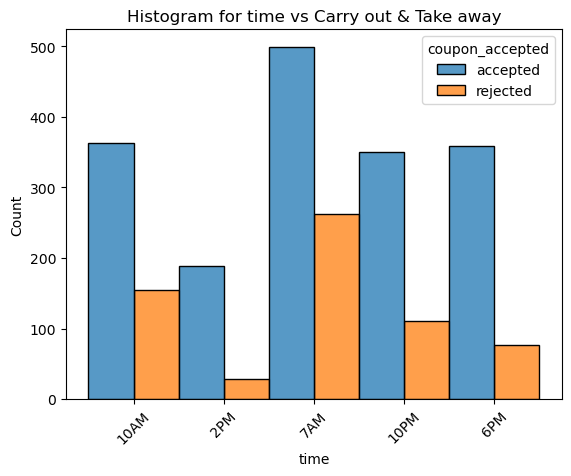

time  coupon_accepted
10AM  accepted           0.702128
      rejected           0.297872
10PM  accepted           0.759219
      rejected           0.240781
2PM   accepted           0.866972
      rejected           0.133028
6PM   accepted           0.825287
      rejected           0.174713
7AM   accepted           0.654856
      rejected           0.345144
Name: proportion, dtype: float64


In [381]:
hist_with_acceptance_rate(carry_away_df, 'time', 'Carry out & Take away')

#### age

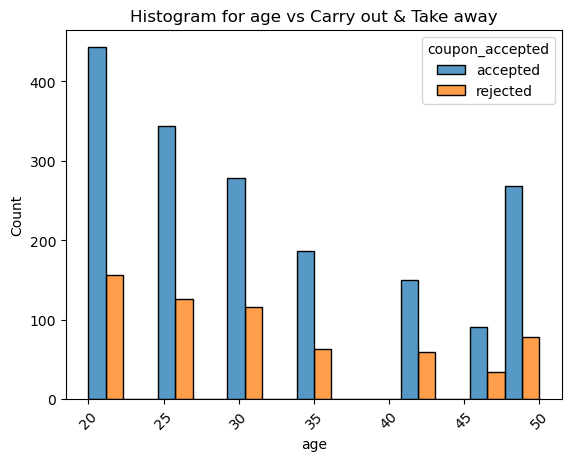

age  coupon_accepted
20   accepted           0.728070
     rejected           0.271930
21   accepted           0.740741
     rejected           0.259259
26   accepted           0.731915
     rejected           0.268085
31   accepted           0.705584
     rejected           0.294416
36   accepted           0.746988
     rejected           0.253012
41   accepted           0.717703
     rejected           0.282297
46   accepted           0.728000
     rejected           0.272000
50   accepted           0.774566
     rejected           0.225434
Name: proportion, dtype: float64


In [384]:
hist_with_acceptance_rate(carry_away_df, 'age', 'Carry out & Take away')

### Restaurant20To50 Coupons


In [387]:
cheap_restaurant_df = data.query('coupon == "Restaurant(<20)"')

#### destination

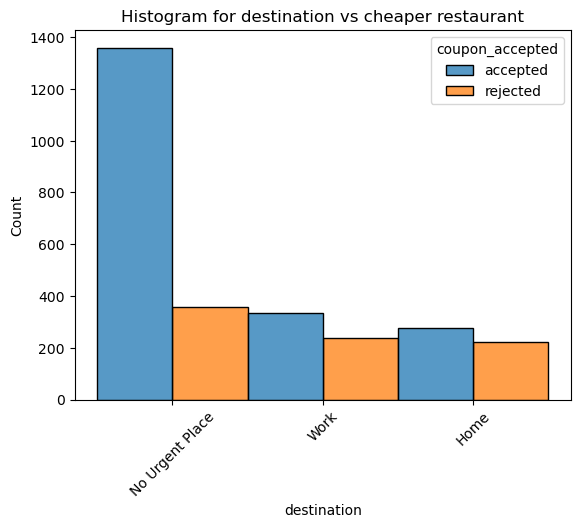

destination      coupon_accepted
Home             accepted           0.555332
                 rejected           0.444668
No Urgent Place  accepted           0.792541
                 rejected           0.207459
Work             accepted           0.582897
                 rejected           0.417103
Name: proportion, dtype: float64


In [390]:
hist_with_acceptance_rate(cheap_restaurant_df, 'destination', 'cheaper restaurant')

#### Passanger

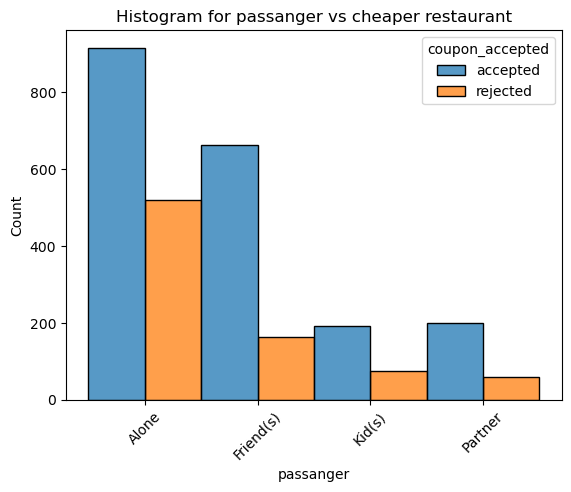

passanger  coupon_accepted
Alone      accepted           0.638328
           rejected           0.361672
Friend(s)  accepted           0.801453
           rejected           0.198547
Kid(s)     accepted           0.722846
           rejected           0.277154
Partner    accepted           0.771318
           rejected           0.228682
Name: proportion, dtype: float64


In [393]:
hist_with_acceptance_rate(cheap_restaurant_df, 'passanger', 'cheaper restaurant')

#### weather

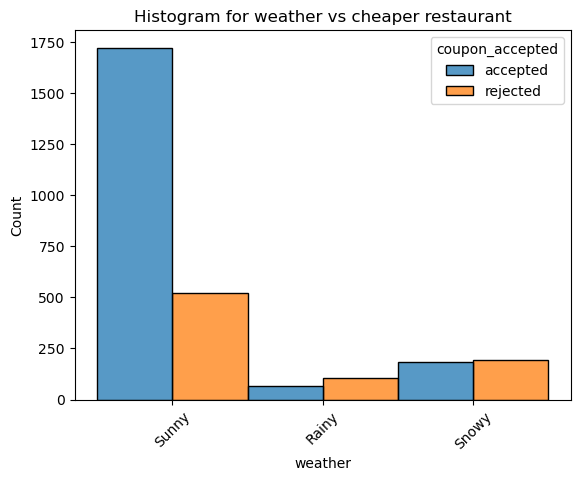

weather  coupon_accepted
Rainy    rejected           0.611765
         accepted           0.388235
Snowy    rejected           0.513298
         accepted           0.486702
Sunny    accepted           0.768304
         rejected           0.231696
Name: proportion, dtype: float64


In [396]:
hist_with_acceptance_rate(cheap_restaurant_df, 'weather', 'cheaper restaurant')

#### temperature

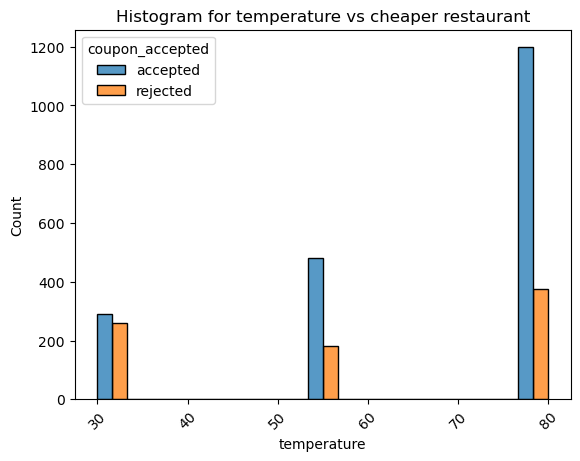

temperature  coupon_accepted
30           accepted           0.529197
             rejected           0.470803
55           accepted           0.726998
             rejected           0.273002
80           accepted           0.760635
             rejected           0.239365
Name: proportion, dtype: float64


In [399]:
hist_with_acceptance_rate(cheap_restaurant_df, 'temperature', 'cheaper restaurant')

#### time

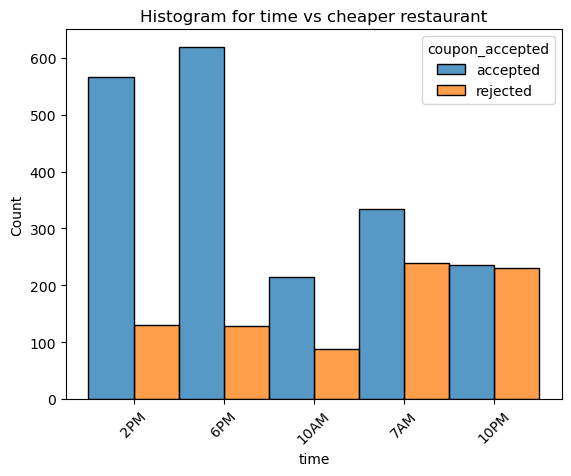

time  coupon_accepted
10AM  accepted           0.709571
      rejected           0.290429
10PM  accepted           0.505376
      rejected           0.494624
2PM   accepted           0.813486
      rejected           0.186514
6PM   accepted           0.827540
      rejected           0.172460
7AM   accepted           0.582897
      rejected           0.417103
Name: proportion, dtype: float64


In [402]:
hist_with_acceptance_rate(cheap_restaurant_df, 'time', 'cheaper restaurant')

#### age

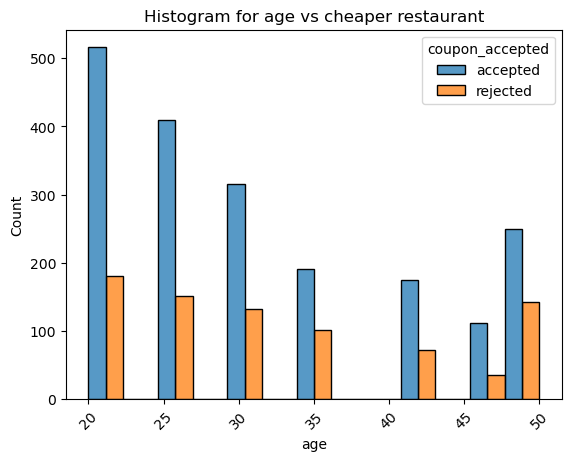

age  coupon_accepted
20   accepted           0.734375
     rejected           0.265625
21   accepted           0.741652
     rejected           0.258348
26   accepted           0.730838
     rejected           0.269162
31   accepted           0.705357
     rejected           0.294643
36   accepted           0.651877
     rejected           0.348123
41   accepted           0.708502
     rejected           0.291498
46   accepted           0.756757
     rejected           0.243243
50   accepted           0.637755
     rejected           0.362245
Name: proportion, dtype: float64


In [405]:
hist_with_acceptance_rate(cheap_restaurant_df, 'age', 'cheaper restaurant')

### Expensive Restaurant

In [408]:
exp_restaurant_df = data.query('coupon == "Restaurant(20-50)"')

#### destination

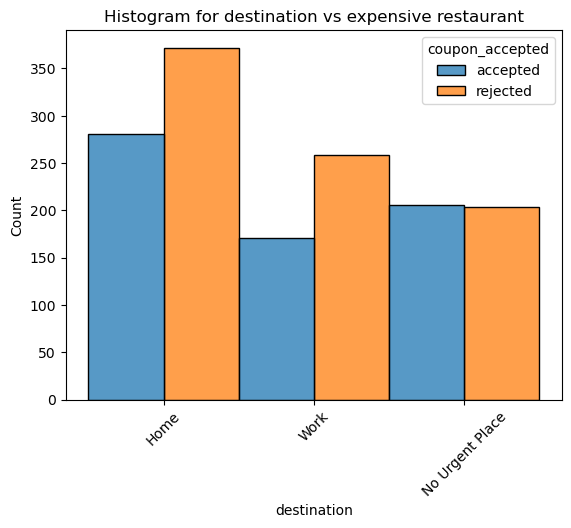

destination      coupon_accepted
Home             rejected           0.569678
                 accepted           0.430322
No Urgent Place  accepted           0.502439
                 rejected           0.497561
Work             rejected           0.601399
                 accepted           0.398601
Name: proportion, dtype: float64


In [411]:
hist_with_acceptance_rate(exp_restaurant_df, 'destination', 'expensive restaurant')

#### passanger

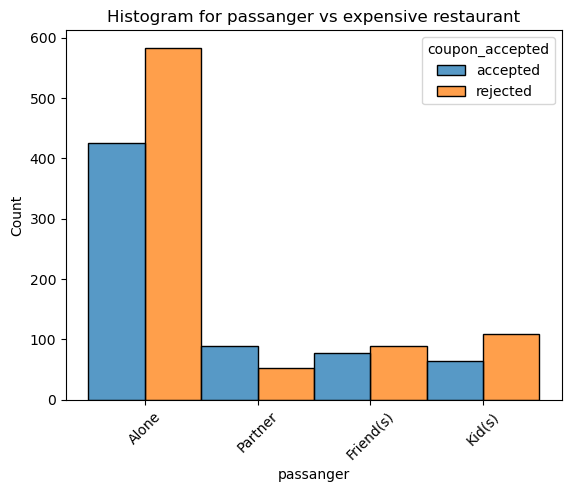

passanger  coupon_accepted
Alone      rejected           0.577800
           accepted           0.422200
Friend(s)  rejected           0.535714
           accepted           0.464286
Kid(s)     rejected           0.626437
           accepted           0.373563
Partner    accepted           0.631206
           rejected           0.368794
Name: proportion, dtype: float64


In [414]:
hist_with_acceptance_rate(exp_restaurant_df, 'passanger', 'expensive restaurant')

#### weather

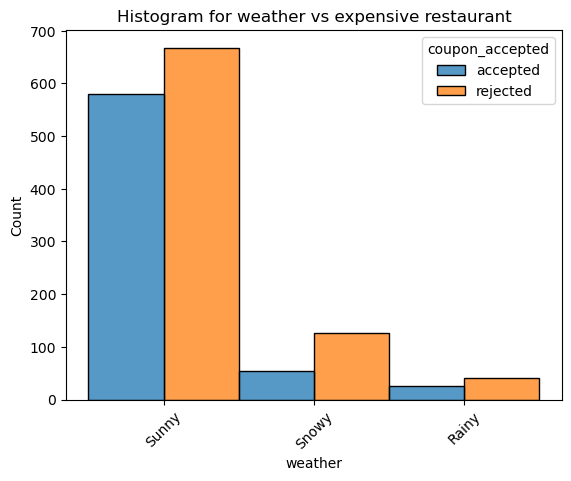

weather  coupon_accepted
Rainy    rejected           0.615385
         accepted           0.384615
Snowy    rejected           0.700000
         accepted           0.300000
Sunny    rejected           0.535686
         accepted           0.464314
Name: proportion, dtype: float64


In [417]:
hist_with_acceptance_rate(exp_restaurant_df, 'weather', 'expensive restaurant')

#### temperature

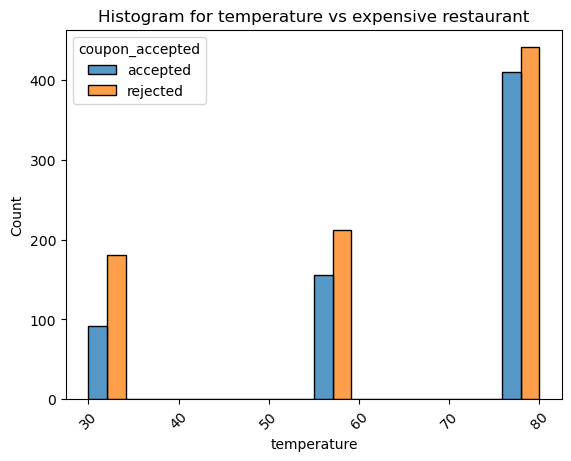

temperature  coupon_accepted
30           rejected           0.663004
             accepted           0.336996
55           rejected           0.576087
             accepted           0.423913
80           rejected           0.518214
             accepted           0.481786
Name: proportion, dtype: float64


In [420]:
hist_with_acceptance_rate(exp_restaurant_df, 'temperature', 'expensive restaurant')

#### time

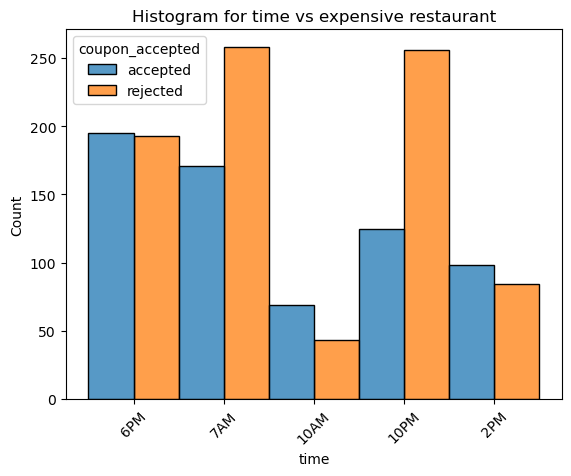

time  coupon_accepted
10AM  accepted           0.616071
      rejected           0.383929
10PM  rejected           0.671916
      accepted           0.328084
2PM   accepted           0.538462
      rejected           0.461538
6PM   accepted           0.502577
      rejected           0.497423
7AM   rejected           0.601399
      accepted           0.398601
Name: proportion, dtype: float64


In [423]:
hist_with_acceptance_rate(exp_restaurant_df, 'time', 'expensive restaurant')

#### age

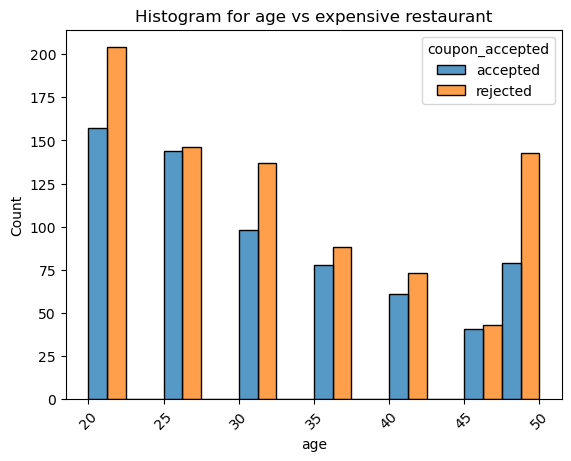

age  coupon_accepted
20   rejected           0.587302
     accepted           0.412698
21   rejected           0.560403
     accepted           0.439597
26   rejected           0.503448
     accepted           0.496552
31   rejected           0.582979
     accepted           0.417021
36   rejected           0.530120
     accepted           0.469880
41   rejected           0.544776
     accepted           0.455224
46   rejected           0.511905
     accepted           0.488095
50   rejected           0.644144
     accepted           0.355856
Name: proportion, dtype: float64


In [426]:
hist_with_acceptance_rate(exp_restaurant_df, 'age', 'expensive restaurant')